In [ ]:
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
 -O /tmp/rockpaperscissors.zip

--2021-09-01 10:03:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 404 The specified resource does not exist.
2021-09-01 10:03:17 ERROR 404: The specified resource does not exist..



In [ ]:
import tensorflow as tensor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import zipfile,os
zip_lcl = '/tmp/rockpaperscissors.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/tmp')
rzip.close()
 
dirbase = '/tmp'
dir_latih = os.path.join(dirbase, 'rockpaperscissors/rps-cv-images')
dir_valid = os.path.join(dirbase, '__MACOSX/rockpaperscissors/rps-cv-images')

BadZipFile: ignored

In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

In [ ]:
os.listdir('/tmp/__MACOSX/rockpaperscissors/rps-cv-images')

['rock', 'paper', '._README_rpc-cv-images.txt', 'scissors']

In [ ]:
latih_batu = os.path.join(dir_latih,'rock')
latih_kertas = os.path.join(dir_latih,'paper')
latih_gunting = os.path.join(dir_latih,'scissors')
batu_valid = os.path.join(dir_valid,'rock')
kertas_valid = os.path.join(dir_valid,'paper')
gunting_valid = os.path.join(dir_valid,'scissors')
dir = os.path.join(dirbase,'rockpaperscissors/rps-cv-images')

In [ ]:
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2,
    shear_range=0.2,
    fill_mode='nearest')

In [ ]:
generator_latih = data_generator.flow_from_directory(
    directory=dir,
    target_size=(180,180),
    batch_size=30,
    subset='training',
    class_mode='categorical')
generator_valid = data_generator.flow_from_directory(
    directory=dir,
    target_size=(180,180),
    batch_size=30,
    subset='validation',
    class_mode='categorical')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
model = tensor.keras.models.Sequential([
  tensor.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(180,180,3)),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(128,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Flatten(),
  tensor.keras.layers.Dense(512,activation='relu'),
  tensor.keras.layers.Dense(3,activation='softmax')
  ])

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=tensor.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

In [ ]:
history = model.fit(
    generator_latih,
    steps_per_epoch=30,
    epochs=10,
    validation_data=generator_valid,
    validation_steps=5,
    verbose=2,
    callbacks=[earstop,cekmodel])

Epoch 1/10
30/30 - 69s - loss: 1.4082 - accuracy: 0.4511 - val_loss: 0.9162 - val_accuracy: 0.6733

Epoch 00001: val_accuracy improved from -inf to 0.67333, saving model to model.hdf5
Epoch 2/10
30/30 - 66s - loss: 0.8363 - accuracy: 0.6356 - val_loss: 0.7465 - val_accuracy: 0.7267

Epoch 00002: val_accuracy improved from 0.67333 to 0.72667, saving model to model.hdf5
Epoch 3/10
30/30 - 66s - loss: 0.6928 - accuracy: 0.7287 - val_loss: 0.5924 - val_accuracy: 0.8000

Epoch 00003: val_accuracy improved from 0.72667 to 0.80000, saving model to model.hdf5
Epoch 4/10
30/30 - 68s - loss: 0.5444 - accuracy: 0.7944 - val_loss: 0.4901 - val_accuracy: 0.8467

Epoch 00004: val_accuracy improved from 0.80000 to 0.84667, saving model to model.hdf5
Epoch 5/10
30/30 - 66s - loss: 0.4261 - accuracy: 0.8468 - val_loss: 0.4859 - val_accuracy: 0.8267

Epoch 00005: val_accuracy did not improve from 0.84667
Epoch 6/10
30/30 - 66s - loss: 0.2906 - accuracy: 0.8967 - val_loss: 0.3286 - val_accuracy: 0.8600



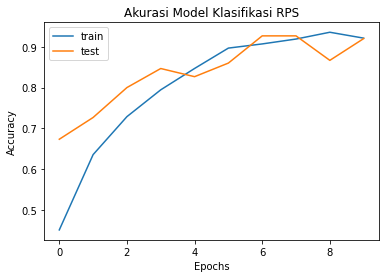

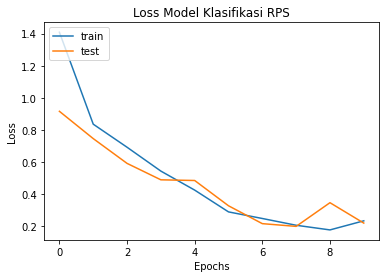

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model Klasifikasi RPS')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model Klasifikasi RPS')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pengubah = tensor.lite.TFLiteConverter.from_keras_model(model)
tflite_model = pengubah.convert()

INFO:tensorflow:Assets written to: /tmp/tmpmull90qd/assets


INFO:tensorflow:Assets written to: /tmp/tmpmull90qd/assets


In [ ]:
with tensor.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save('model.pb') 
%cd

INFO:tensorflow:Assets written to: model.pb/assets


INFO:tensorflow:Assets written to: model.pb/assets


/root
